In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement :
    Predicting product-level revenue in global sports footwear sales using machine learning to support pricing and inventory decisions

In [2]:
df = pd.read_csv('global_sports_footwear_sales.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
0,ORD100000,2021-01-30,ASICS,Model-370,Running,Unisex,8,Black,162,15,137.70,1,137.7,Card,Retail Store,Germany,Low,4.6
1,ORD100001,2026-10-05,Reebok,Model-314,Lifestyle,Men,8,Grey,80,5,76.00,3,228.0,Card,Online,USA,Low,3.9
2,ORD100002,2023-11-12,ASICS,Model-763,Lifestyle,Men,8,Black,176,15,149.60,4,598.4,Cash,Retail Store,India,Medium,3.0
3,ORD100003,2026-08-29,Reebok,Model-905,Basketball,Women,7,White,61,15,51.85,2,103.7,Card,Retail Store,India,High,3.4
4,ORD100004,2019-11-09,Nike,Model-413,Training,Men,11,Black,80,0,80.00,4,320.0,Cash,Online,USA,Medium,3.0


In [4]:
df.shape

(30000, 18)

In [5]:
df.isnull().sum()

order_id                 0
order_date               0
brand                    0
model_name               0
category                 0
gender                   0
size                     0
color                    0
base_price_usd           0
discount_percent         0
final_price_usd          0
units_sold               0
revenue_usd              0
payment_method           0
sales_channel            0
country                  0
customer_income_level    0
customer_rating          0
dtype: int64

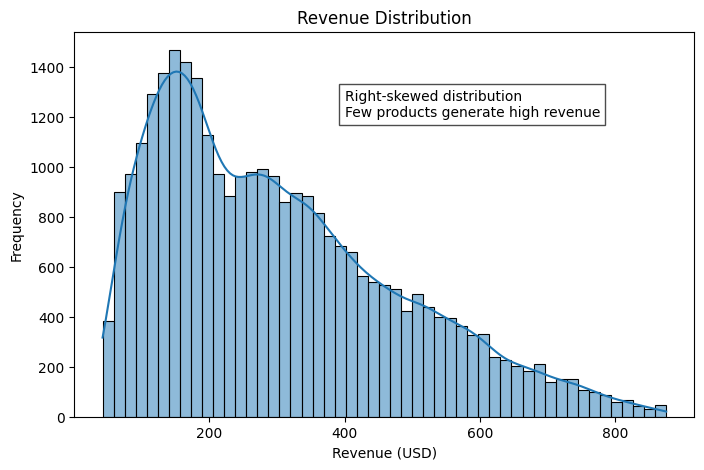

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['revenue_usd'], kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue (USD)')
plt.ylabel('Frequency')
plt.text(
    400, 1200, 
    'Right-skewed distribution\nFew products generate high revenue',
    fontsize=10,
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()


In [7]:
df.head(1)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
0,ORD100000,2021-01-30,ASICS,Model-370,Running,Unisex,8,Black,162,15,137.7,1,137.7,Card,Retail Store,Germany,Low,4.6


In [8]:
df = df.drop(['order_id' , 'order_date'] , axis = 1)

In [9]:
df['revenue_usd'] = np.log(df['revenue_usd'])

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

df['brand'] = le.fit_transform(df['brand'])
df['model_name'] = le.fit_transform(df['model_name'])
df['category'] = le.fit_transform(df['category'])
df['gender'] = le.fit_transform(df['gender'])
df['color'] = le.fit_transform(df['color'])
df['payment_method'] = le.fit_transform(df['payment_method'])
df['sales_channel'] = le.fit_transform(df['sales_channel'])
df['country'] = le.fit_transform(df['country'])
df['customer_income_level'] = le.fit_transform(df['customer_income_level'])



In [12]:
df.corr()

,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
brand,1.000000,-0.000244,-0.004660,-0.010568,0.007869,0.013827,-0.003989,-0.001586,-0.002109,-0.008048,-0.008196,0.002349,0.000450,-0.000818,0.002010,0.004998
model_name,-0.000244,1.000000,-0.000822,-0.001563,0.001810,-0.000019,0.001927,0.004073,0.000684,0.002809,0.002781,-0.003369,0.000347,0.006700,0.008477,-0.005735
category,-0.004660,-0.000822,1.000000,-0.005112,-0.004311,-0.000267,0.010308,-0.001590,0.010668,0.004879,0.009728,-0.003146,-0.003223,0.000102,0.002619,0.003316
gender,-0.010568,-0.001563,-0.005112,1.000000,-0.001308,0.001558,0.002898,-0.002475,0.003604,0.012449,0.014525,-0.006262,0.005127,0.003198,-0.002590,0.007005
size,0.007869,0.001810,-0.004311,-0.001308,1.000000,-0.001781,-0.000702,-0.002299,-0.000096,-0.002659,-0.003059,0.002411,-0.001812,-0.005330,0.002098,-0.005961
color,0.013827,-0.000019,-0.000267,0.001558,-0.001781,1.000000,-0.003741,-0.012076,-0.000508,0.003371,0.003363,-0.011936,0.002220,-0.000326,0.001592,-0.012264
base_price_usd,-0.003989,0.001927,0.010308,0.002898,-0.000702,-0.003741,1.000000,-0.002360,0.940114,0.005353,0.554664,0.004371,0.001176,0.006719,0.002607,-0.005461
discount_percent,-0.001586,0.004073,-0.001590,-0.002475,-0.002299,-0.012076,-0.002360,1.000000,-0.325977,0.005930,-0.177151,-0.002121,-0.008803,0.009435,0.001970,0.000662
final_price_usd,-0.002109,0.000684,0.010668,0.003604,-0.000096,-0.000508,0.940114,-0.325977,1.000000,0.002479,0.577966,0.005408,0.004068,0.004327,0.001290,-0.005265
units_sold,-0.008048,0.002809,0.004879,0.012449,-0.002659,0.003371,0.005353,0.005930,0.002479,1.000000,0.794207,-0.012286,-0.002765,-0.006493,-0.007163,-0.001177


In [13]:
df.head()

,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
0,0,270,3,1,8,0,162,15,137.70,1,4.925077,1,1,0,1,4.6
1,5,214,2,0,8,2,80,5,76.00,3,5.429346,1,0,5,1,3.9
2,0,663,2,0,8,0,176,15,149.60,4,6.394259,2,1,1,2,3.0
3,5,805,0,2,7,4,61,15,51.85,2,4.641502,1,1,1,0,3.4
4,3,313,4,0,11,0,80,0,80.00,4,5.768321,2,0,5,2,3.0


# Model Building

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = df.drop('revenue_usd' , axis = 1)
y = df['revenue_usd']

In [16]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=1)


In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dtr = DecisionTreeRegressor(
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=1
)


dtr.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                      random_state=1)

In [19]:
dtr.score(x_test , y_test)*100 , dtr.score(x_train , y_train)*100

(99.97143065913369, 99.9717704415254)

In [20]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [21]:
y_pred = dtr.predict(x_test)

In [22]:
y_pred[:5]

array([5.978897  , 6.16092991, 5.7397038 , 4.38180526, 6.11074656])

In [23]:
y_test[:5]

10747    5.973810
12573    6.165313
29676    5.727499
8856     4.383276
21098    6.125995
Name: revenue_usd, dtype: float64

# Model Evaluation

In [24]:
mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score :",r2)

MSE : 0.0001199097024795742
RMSE : 0.010950328875407086
MAE : 0.008283578357922617
R2 Score : 0.9997143065913369


In [25]:
y_train_pred = dtr.predict(x_train)

In [26]:
mse = mean_squared_error(y_train, y_train_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_train_pred)
print("MAE :",mae)

r2 = r2_score(y_train, y_train_pred)
print("R2 Score :",r2)

MSE : 0.00011725871556528191
RMSE : 0.010828606353787264
MAE : 0.00818870452246154
R2 Score : 0.9997177044152539


# Conclusion
This project demonstrates the use of a Decision Tree model for analyzing sales performance in the global sports footwear market.
After data cleaning and analysis, the model was able to capture key pricing and sales patterns effectively.
The results highlight how machine learning can support data-driven decision-making in retail and sales domains.

# Model Testing 

In [27]:
new_data = x.sample(5, random_state=42)
predictions = dtr.predict(new_data)


In [28]:
comparison = pd.DataFrame({
    "Actual": y.loc[new_data.index],
    "Predicted": predictions
})
np.expm1(comparison)


,Actual,Predicted
2308,91.70,91.808489
22404,124.30,124.131528
23397,143.90,144.078001
25058,408.50,409.777583
2664,84.85,85.108711


### Model Retraining

After finalizing the selected features, the model was retrained to align with the
deployment requirements and ensure reliable predictions on new data.


In [29]:
selected_features = [
    "base_price_usd",
    "discount_percent",
    "final_price_usd",
    "units_sold",
    "customer_rating",
    "customer_income_level"
]

x = df[selected_features]
y = df["revenue_usd"]   


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [31]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                      random_state=1)

In [32]:
y_pred = dtr.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.9997297826261986


In [33]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(dtr, f)
